In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [3]:
data=pd.read_csv("D:\Excel R\Assignments\Assignment 14\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:xlabel='Work.Experience'>

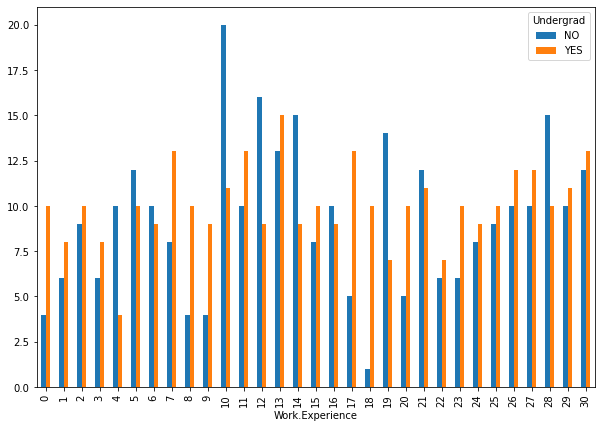

In [10]:
pd.crosstab(data['Work.Experience'],data['Undergrad']).plot(kind='bar',figsize=(10,7))

<AxesSubplot:xlabel='Undergrad'>

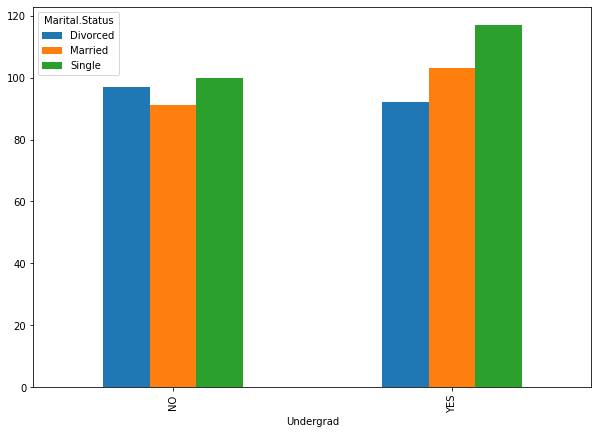

In [8]:
pd.crosstab(data['Undergrad'],data['Marital.Status']).plot(kind='bar',figsize=(10,7))

<AxesSubplot:xlabel='Work.Experience'>

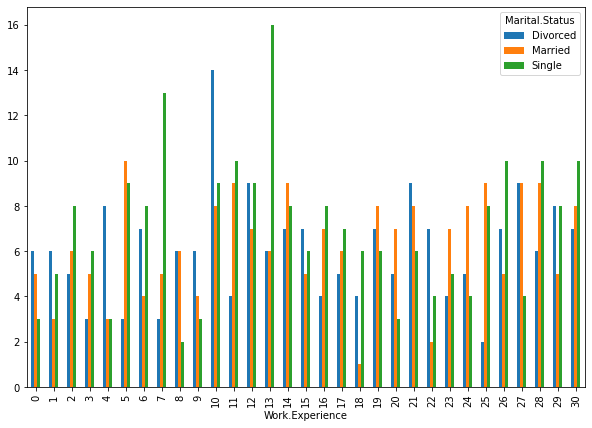

In [13]:
pd.crosstab(data['Work.Experience'],data['Marital.Status'],).plot(kind='bar',figsize=(10,7))

In [15]:
rvm=pd.cut(data['Taxable.Income'],bins=[0,30000,100000],labels=['Risky','Good'])
rvm

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [23]:
data['Status']=rvm
d1=data.drop(['Taxable.Income'],axis=1)
d1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status,Status
0,NO,Single,50047,10,YES,Good,Good
1,YES,Divorced,134075,18,YES,Good,Good
2,NO,Married,160205,30,YES,Good,Good
3,YES,Single,193264,15,YES,Good,Good
4,NO,Married,27533,28,NO,Good,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good,Good
596,YES,Divorced,55369,2,YES,Good,Good
597,NO,Divorced,154058,0,YES,Good,Good
598,YES,Married,180083,17,NO,Good,Good


In [24]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   City.Population  600 non-null    int64   
 3   Work.Experience  600 non-null    int64   
 4   Urban            600 non-null    object  
 5   status           600 non-null    category
 6   Status           600 non-null    category
dtypes: category(2), int64(2), object(3)
memory usage: 25.0+ KB


In [25]:
objects=['Undergrad','Marital.Status','Urban']
d1[objects]=data[objects].astype('category')
d1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status,Status
0,NO,Single,50047,10,YES,Good,Good
1,YES,Divorced,134075,18,YES,Good,Good
2,NO,Married,160205,30,YES,Good,Good
3,YES,Single,193264,15,YES,Good,Good
4,NO,Married,27533,28,NO,Good,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good,Good
596,YES,Divorced,55369,2,YES,Good,Good
597,NO,Divorced,154058,0,YES,Good,Good
598,YES,Married,180083,17,NO,Good,Good


In [27]:
obj1=['Undergrad','Marital.Status','Urban','Status']
d1[obj1]=d1[obj1].apply(LabelEncoder().fit_transform)
d1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status,Status
0,0,2,50047,10,1,Good,0
1,1,0,134075,18,1,Good,0
2,0,1,160205,30,1,Good,0
3,1,2,193264,15,1,Good,0
4,0,1,27533,28,0,Good,0
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,Good,0
596,1,0,55369,2,1,Good,0
597,0,0,154058,0,1,Good,0
598,1,1,180083,17,0,Good,0


In [58]:
data1=d1.drop(['status'],axis=1)
data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Status
0,0,2,-1.178521,10,1,0
1,1,0,0.508500,18,1,0
2,0,1,1.033109,30,1,0
3,1,2,1.696831,15,1,0
4,0,1,-1.630532,28,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,7,1,0
596,1,0,-1.071672,2,1,0
597,0,0,0.909696,0,1,0
598,1,1,1.432197,17,0,0


In [34]:
d1.Status.value_counts()

0    476
1    124
Name: Status, dtype: int64

In [35]:
d=d1.copy

In [59]:
data1.iloc[:,2:3]=StandardScaler().fit_transform(d1.iloc[:,2:3])
data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Status
0,0,2,-1.178521,10,1,0
1,1,0,0.508500,18,1,0
2,0,1,1.033109,30,1,0
3,1,2,1.696831,15,1,0
4,0,1,-1.630532,28,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,7,1,0
596,1,0,-1.071672,2,1,0
597,0,0,0.909696,0,1,0
598,1,1,1.432197,17,0,0


In [60]:
x=data1.iloc[:,0:5]
y=data1.iloc[:,5]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

Creation of the algorithm to see where to prune decision tree:- 

In [62]:
acc=[]
for i in range(1,10):
    dt=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dt.fit(x_train,y_train)
    train_acc=np.mean(y_train==dt.predict(x_train))
    test_acc=np.mean(y_test==dt.predict(x_test))
    acc.append([train_acc,test_acc])

In [63]:
accuracy=pd.DataFrame(acc,columns=['Train Accuracy','Test Accuracy'])
accuracy['depth']=np.arange(1,10)
accuracy

,Train Accuracy,Test Accuracy,depth
0,0.807143,0.761111,1
1,0.807143,0.761111,2
2,0.814286,0.761111,3
3,0.816667,0.755556,4
4,0.823810,0.738889,5
5,0.835714,0.733333,6
6,0.847619,0.738889,7
7,0.866667,0.711111,8
8,0.885714,0.683333,9


## Building Decision Tree Classifier:-

In [74]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [75]:
model.get_n_leaves()

10

In [76]:
predictions=model.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [77]:
pd.crosstab(y_test,predictions)

col_0,0,1
Status,,
0,136,1
1,43,0


In [78]:
### Accuracy:-
np.mean(predictions==y_test)

0.7555555555555555

In [79]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       179
           1       0.00      0.00      0.00         1

    accuracy                           0.76       180
   macro avg       0.50      0.38      0.43       180
weighted avg       0.99      0.76      0.86       180



## Graphical Representation:-

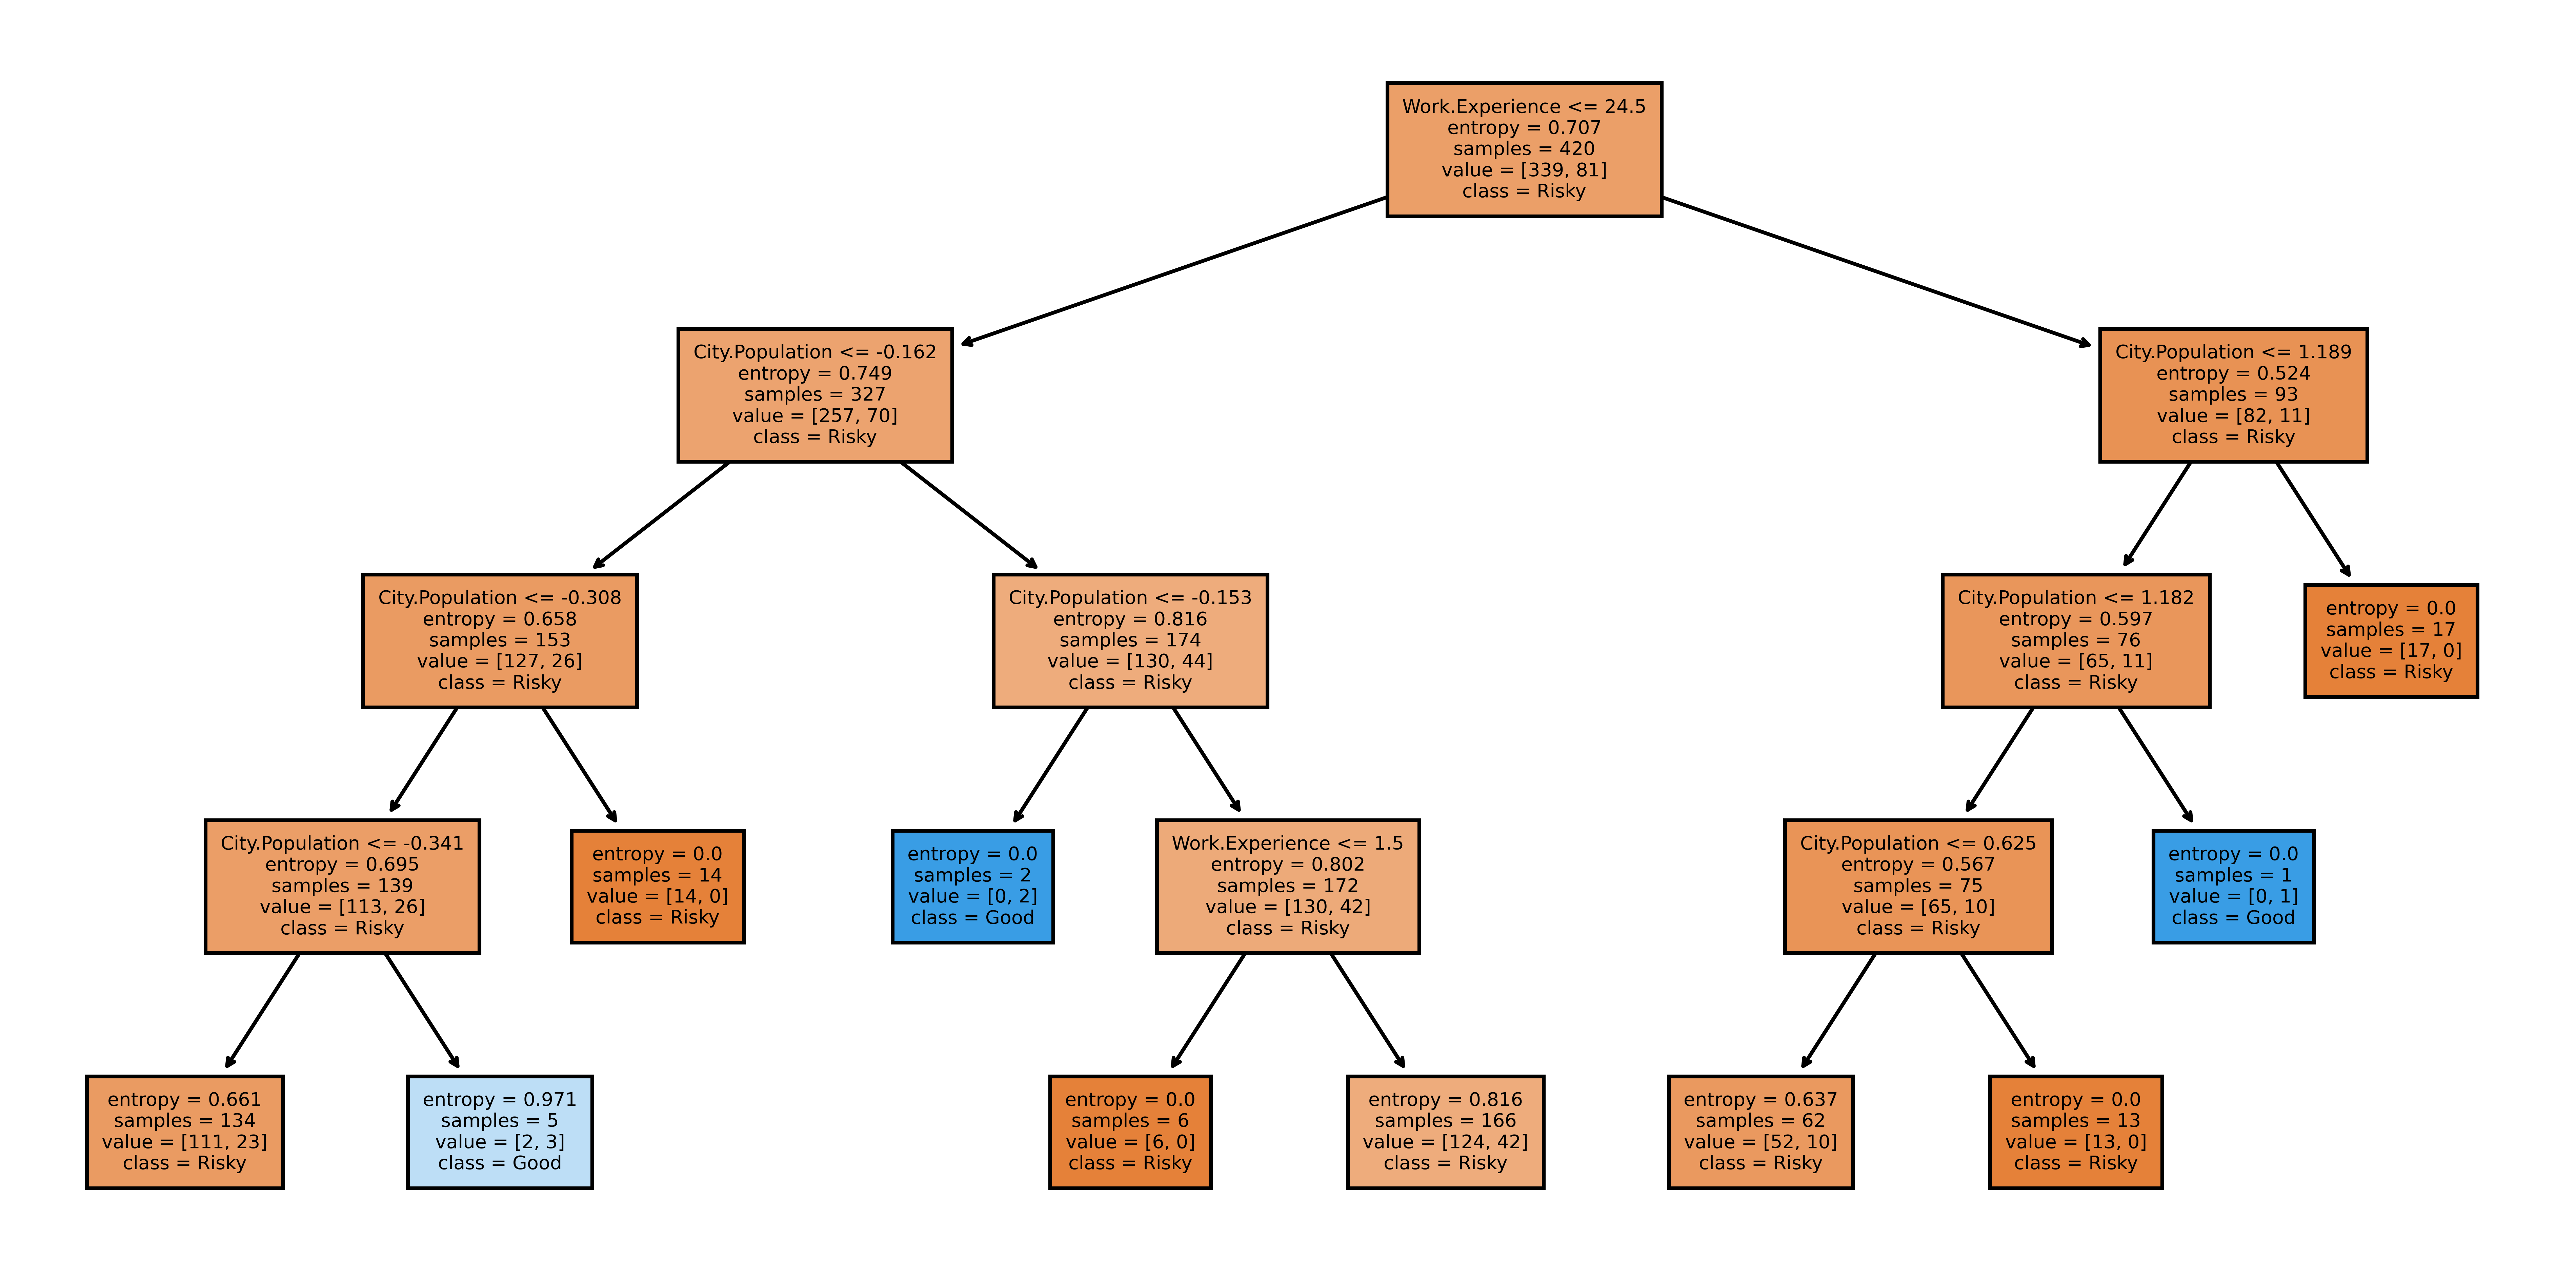

In [81]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky','Good']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(12,6),dpi=800)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              fontsize=5,
              filled=True);